# How to use the datasets provided by the gan_t2i module

Import from the module `gan_t2i.datasets.DatasetFactory` the `DataFactory`

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import random
import numpy as np

import torchvision.transforms as transforms
from torch.utils.data import DataLoader

module_path = os.path.join(os.getcwd(), '../src')
sys.path.append(module_path)

# Use the DatasetFactory to load the dataset
import gan_t2i.datasets.DatasetFactory as DatasetFactory

For the datasets you can choose how to store it: in memory or by creading a h5 file. The default storing modality, the one that we recommend, is HDF5.

Each fild of the dataset is made up by the image as `PIL` image, the caption (the description of the image) as `string` and the class of the image as `integer` number.

You can transform the dataset fields indipendently, this means that you can define a transformation for the image one for the caption and another one for the class.

For example we can convert the images in tensors.

In [2]:
transform_img = transforms.Compose([
    transforms.ToTensor(),
])

## Flowers Dataset

Create the dataset (e.g. the flower dataset)

In [3]:
# Create a data folder where to store the dataset
data_folder = os.path.join(os.getcwd(), '../data')

# Create the dataset
flower_dataset = DatasetFactory.Flowers(data_folder, transform_img=transform_img)

Captions already downloaded
images already downloaded
Captions already extracted
images already extracted
The dataset is already stored in HDF5 format


All the images in the laoded dataset have the resize dimension (in this case 64 x 64 x 3 color channels)

In [4]:
for idx, (img, cap, class_number) in enumerate(flower_dataset):
    assert img.numpy().shape == (3, 64, 64)  # check the shape of the images
print("All images have the right shape!")

All images have the right shape!


Let's see the dataset length

In [5]:
print("dataset length: ", len(flower_dataset))

dataset length:  81890


Let's see some images of the dataset with the corresponding caption

image 1 caption: this flower has a lot of yellow petals with brown in the middle
image 2 caption: this flower has petals that are orange and has yellow style
image 3 caption: this flower is white in color, and has petals that are vertically layered.
image 4 caption: a flower that has petals that are pink, soft, smooth, separated and fully curled in the centre and opening at the outer layers


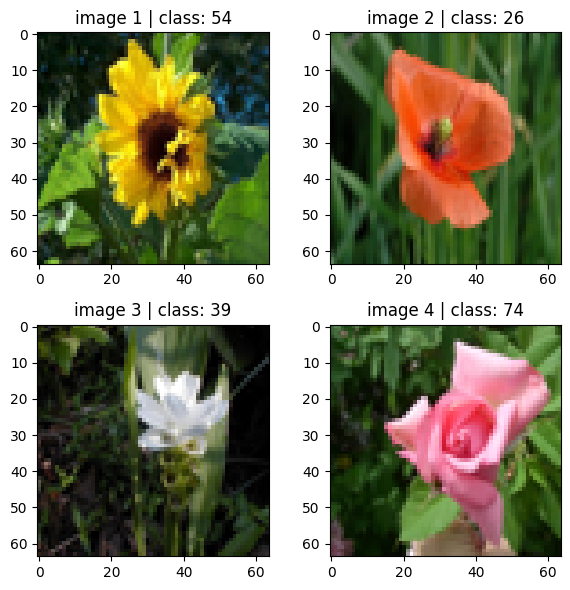

In [13]:
random_indexes = [random.randint(0, len(flower_dataset) - 1) for _ in range(4)]

plt.figure(figsize=(6,6))
for i, d_index in enumerate(random_indexes):
    plt.subplot(2,2,i+1)
    plt.imshow(transforms.ToPILImage()(flower_dataset[d_index][0]))
    plt.title(f"image {i+1} | class: {flower_dataset[d_index][2]}")    
    print(f"image {i+1} caption: {flower_dataset[d_index][1]}")
plt.tight_layout()
plt.show()

## Birds Dataset

Let's now test the birds dataset

In [7]:
# Create a data folder where to store the dataset
data_folder = os.path.join(os.getcwd(), '../data')

# Create the dataset
birds_dataset = DatasetFactory.Birds(data_folder, resize=(64, 64), transform_img=transform_img)

Captions already downloaded
Images already downloaded
The dataset is already stored in HDF5 format


In [9]:
for idx, (img, cap, class_number) in enumerate(birds_dataset):
    assert img.numpy().shape == (3, 64, 64)  # check the shape of the images
print("All images have the right shape!")

All images have the right shape!


In [10]:
print("dataset length: ", len(birds_dataset))

dataset length:  117800


image 1 caption: a small bird with long body, and a black and white coloration.
image 2 caption: this bird is white with black and has a long, pointy beak.
image 3 caption: this bird has wings that are black and brown and has a red chest
image 4 caption: this large bird is mostly white with a black crown and long pointy yellow bill.


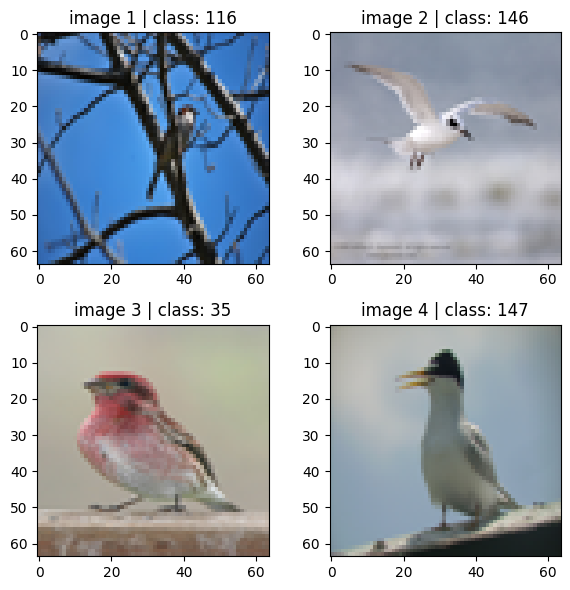

In [14]:
random_indexes = [random.randint(0, len(birds_dataset) - 1) for _ in range(4)]

plt.figure(figsize=(6,6))
for i, d_index in enumerate(random_indexes):
    plt.subplot(2,2,i+1)
    plt.imshow(transforms.ToPILImage()(birds_dataset[d_index][0]))
    plt.title(f"image {i+1} | class: {birds_dataset[d_index][2]}")    
    print(f"image {i+1} caption: {birds_dataset[d_index][1]}")
plt.tight_layout()
plt.show()

## Using Torch DataLoader with the datasets

You can use the provided `DataLoader` of pytorch to load, shuffle, divide into batches, etc... the datasets.

In [12]:
flowers_dataloader = DataLoader(flower_dataset, batch_size=32, shuffle=True, num_workers=4)

batch_numbers = 0
for images, captions, class_number in flowers_dataloader:
    batch_numbers += 1
print("Number of batches: ", batch_numbers)

TypeError: h5py objects cannot be pickled

In [ ]:
birds_dataloader = DataLoader(birds_dataset, batch_size=32, shuffle=True, num_workers=4)

batch_numbers = 0
for images, captions, class_number in birds_dataloader:
    batch_numbers += 1
print("Number of batches: ", batch_numbers)

Number of batches:  3682
